# Answer for Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import string

In [2]:
f1 = open('D:\学习\集思项目\\Nathaniel Hawthorne.txt','r',encoding = 'utf-8')
f2 = open('D:\学习\集思项目\\Charles Dickens.txt','r',encoding = 'utf-8')

In [3]:
NH = f1.read()
CD = f2.read()

In [4]:
NH_lower = NH.lower()
CD_lower = CD.lower()

In [5]:
remove = str.maketrans('','',string.punctuation) 
NH_without_punctuation = NH_lower.translate(remove)
CD_without_punctuation = CD_lower.translate(remove)

In [6]:
import nltk
NH_tokens = nltk.word_tokenize(NH_without_punctuation)
CD_tokens = nltk.word_tokenize(CD_without_punctuation)

In [7]:
def countWords(t):
    
    counts = {}
    for word in t:
        if len(word) == 1:
            continue
        elif str.isdigit(word) == True:
            continue
        else:
            counts[word] = counts.get(word, 0) + 1
    
    return counts

In [8]:
NH_counts = countWords(NH_tokens)
CD_counts = countWords(CD_tokens)

In [9]:
target = '"Joe had got his coat and waistcoat and cravat off, and his leather apron on, and passed into the forge. One of the soldiers opened its wooden windows, another lighted the fire, another turned to at the bellows, the rest stood round the blaze, which was soon roaring. Then Joe began to hammer and clink, hammer and clink, and we all looked on.'
target_lower = target.lower()
target_without_punctuation = target_lower.translate(remove)
target_tokens = nltk.word_tokenize(target_without_punctuation)
target_counts = countWords(target_tokens)

In [10]:
total_counts = countWords(NH_tokens + CD_tokens)

In [11]:
def calcSum(counts):
    
    sum = 0
    
    for word in counts:
        sum += counts[word]
    
    return sum


In [12]:
def calcP(counts, total_counts, target_counts):
    
    length = len(total_counts)
    Sum = calcSum(counts)
    
    P = 1
    
    for word in target_counts:
        # Using Laplacian Smoothing
        if word in counts:
            P = P * (counts[word] + 1)/ (Sum + length)
        else:
            P = P * (0 + 1) / (Sum + length)
    
    return P

In [13]:
PinNH = calcP(NH_counts, total_counts, target_counts)
PinCD = calcP(CD_counts, total_counts, target_counts)
print('The probability of text written by Nathaniel Hawthorne is',PinNH,'\n')
print('The probability of text written by Charles Dickens is',PinCD,'\n')
if PinNH > PinCD:
    print('According to the probability, the text was written by Nathaniel Hawthorne!')
else:
    print('According to the probability, the text was written by Charles Dickens!')

The probability of text written by Nathaniel Hawthorne is 6.622508962705102e-159 

The probability of text written by Charles Dickens is 1.7819968401931808e-142 

According to the probability, the text was written by Charles Dickens!


# Answer for Question 2 (1)

In [14]:
def txt2matrix(Filename):
    fr = open(Filename)
    fr = fr.readlines()
    num_rows = len(fr)
    num_columns = len(fr[0].split())
    out_matrix = np.zeros((num_rows-1, num_columns))
    for i in range(0,num_rows):
        out_matrix[i-1,:] = fr[i].split()
    return out_matrix

In [15]:
data = txt2matrix('D:\学习\集思项目\points.txt')

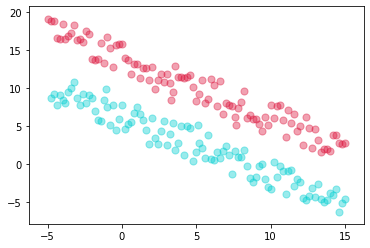

In [16]:
row = len(data)
area = np.pi * 4 ** 2

for i in range(row):
    if data[i,2] == -1:
        plt.scatter(data[i,0], data[i,1], s = area, c = '#00CED1', alpha = 0.4, label = 'Type 1')
    else:
        plt.scatter(data[i,0], data[i,1], s = area, c = '#DC143C', alpha = 0.4, label = 'Type 2')

In [17]:
X = data[:,0:2]
Y = data[:,2:]
X = np.column_stack((X,np.ones(len(data))))

In [18]:
W = np.ones((3,1))

In [19]:
def GradientDescent(X,Y,W):
    C = 0.1
    eta = 0.0001
    length = len(X)
    deviation = np.ones((3,1))
    while max(eta * deviation) > 0.000001:
        for i in range(3):
            deviation[i] = W[i]
            for j in range(length):
                if X[j].dot(W) * Y[j] < 1:
                    deviation[i] += C * (-Y[j] * X[j,i])
        W = W - eta * deviation
    return W

In [20]:
W = GradientDescent(X,Y,W)

In [21]:
test = np.arange(-5,15,0.1)
test_Y = -(W[0] * test + W[2]) / W[1]

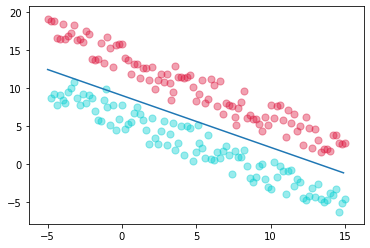

In [22]:
row = len(data)
area = np.pi * 4 ** 2

for i in range(row):
    if data[i,2] == -1:
        plt.scatter(data[i,0], data[i,1], s = area, c = '#00CED1', alpha = 0.4, label = 'Type 1')
    else:
        plt.scatter(data[i,0], data[i,1], s = area, c = '#DC143C', alpha = 0.4, label = 'Type 2')
plt.plot(test, test_Y)

# Answer for Question 2 (2)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data[:,0:2], data[:,2:], test_size = 0.2, random_state=42)

In [25]:
X_train = np.column_stack((X_train, np.ones(len(X_train))))
X_test = np.column_stack((X_test, np.ones(len(X_test))))

In [26]:
W = np.ones((3,1))
W = GradientDescent(X_train, y_train, W)

The Accuracy is  97.5609756097561 %



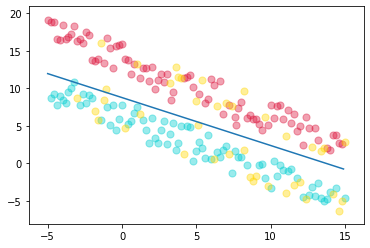

In [27]:
count = 0
for i in range(len(X_test)):
    if X_test[i].dot(W) * y_test[i] > 0:
        count += 1
Accuracy = count / len(X_test)
print('The Accuracy is ',Accuracy * 100,'%\n')

test = np.arange(-5,15,0.1)
test_Y = -(W[0] * test + W[2]) / W[1]

row = len(X_train)
area = np.pi * 4 ** 2

for i in range(row):
    if y_train[i] == -1:
        plt.scatter(X_train[i,0], X_train[i,1], s = area, c = '#00CED1', alpha = 0.4, label = 'Type 1')
    else:
        plt.scatter(X_train[i,0], X_train[i,1], s = area, c = '#DC143C', alpha = 0.4, label = 'Type 2')
plt.plot(test, test_Y)

for i in range(len(X_test)):
    plt.scatter(X_test[i,0], X_test[i,1], s = area, c = 'gold', alpha = 0.4, label = 'Test Data')

In [28]:
Gamma = W[0] ** 2 + W[1] ** 2
print(chr(947),'=',Gamma)

γ = [0.09765377]
